## Interactions and Polynomials

Another way to enrich a feature representation, particularly for linear models, is adding *interaction features* and *polynomial features* of the original data. This kind of feature engineering is often used in statistical modeling, but it’s also common in many practical machine learning applications.

As a first example, recall the plot of the binned linear regression. The linear model learned a constant value for each bin in the wave dataset. We know, however, that linear models can learn not only offsets, but also slopes. One way to add a slope to the linear model on the binned data is to add the original feature (the x-axis in the plot) back in. This leads to an 11-dimensional dataset:

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

X, y = mglearn.datasets.make_wave(n_samples=120)

kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

In [6]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


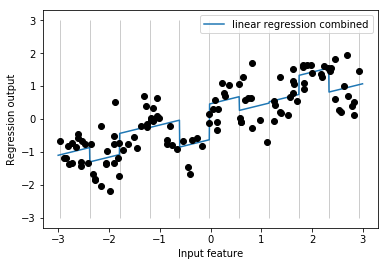

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_combined, y)

line_binned = kb.transform(line)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In this example, the model learned an offset for each bin, together with a slope. The learned slope is downward, and shared across all the bins—there is a single x-axis feature, which has a single slope. Because the slope is shared across all bins, it doesn’t seem to be very helpful. We would rather have a separate slope for each bin! We can achieve this by adding an interaction or product feature that indicates which bin a data point is in and where it lies on the x-axis. This feature is a product of the bin indicator and the original feature. 

Let’s create this dataset: